Project: working with exit surveys from employees of DETE (Department of Education, Training and Employment) and TAFE (Technical and Further Education) in Australia

goals:
- find out relation between short and long period of service resigning due to dissatisfaction
- find out relation between and younger and older employees resigning due to dissatisfaction

In [64]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [65]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")


In [66]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [67]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [68]:
print(f" dete's shape is {dete_survey.shape}")
print(f" tafe's shape is {tafe_survey.shape}")

 dete's shape is (822, 56)
 tafe's shape is (702, 72)


In [69]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [70]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Observations: 
- Dete has 120 more entries than tafe, 
- indexes from both data sets are different, needs to be cleaned, 
- many columns with na entries, needs to be looked into to see if we can remove the entire column, see many irrelevant columns
- tafe_survey contains many multiple choice/ short answers, where dete does not
- dete_survey contains "Not Stated" values, aren't represented as NaN -> changed with pd_read.csv function na_values="Not Stated"

Get rid of irrelevant columns/ keep columns that exist in both datasets

In [71]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [72]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

Now, clean columns of datasets

In [73]:
dete_survey_updated.columns = (
    dete_survey_updated.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

In [74]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [75]:
tafe_survey_updated = tafe_survey_updated.rename(columns={
    
    "Record ID": "id",
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',  
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
})

In [76]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [77]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

Observe there are 3 different variations for resignation for dete_survey dataset

In [78]:
tafe_survey_updated["separationtype"].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

Since the goal of the project is focused on employees that have resigned, we select only data for employees who have the resignation separation type

for dete_survey, we include all resignation labels

In [79]:
tafe_resignation = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

In [80]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]
dete_resignation = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

In [81]:
dete_resignation

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


Now that we have narrowed down the data we want to clean/ manipulate, now verify if all data is correct (no major inconsistencies), first check the years in cease_date, and dete_start_date

- make sure start date < cease date
- start date should not be before 1940 (most employees start in their 20s)

In [82]:
dete_resignation["cease_date"].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

clean cease_date so it only shows years

In [83]:
dete_resignation["cease_date"] = dete_resignation["cease_date"].str.split("/").str[-1].astype(float)

In [84]:
dete_resignation["cease_date"].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [85]:
dete_resignation["dete_start_date"].value_counts()

dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1992.0     6
1994.0     6
1998.0     6
2002.0     6
2003.0     6
1996.0     6
1993.0     5
1980.0     5
1997.0     5
1990.0     5
1991.0     4
1995.0     4
1989.0     4
1988.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1982.0     1
1973.0     1
1977.0     1
1963.0     1
1972.0     1
1971.0     1
1984.0     1
1975.0     1
1987.0     1
Name: count, dtype: int64

In [86]:
tafe_resignation["cease_date"].value_counts()

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

Observations:
- most dete start dates are in the 21st century
- most cease date in tafe is 2011, while most ceased in dete in 2013
- while most cease date in tafe is 2011, most start dates in dete is also 2011



In [87]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']
dete_resignation['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

create new column of length of service in dete, this column exists in tafe already

Now, we go to the "dissatisfaction" part of the project, after we found all employees that resigned and that all data is valid.
For tafe_survey, we look at columns of:
- "Contributing Factors. Dissatisfaction"
- "Contributing Factors. Job Dissatisfaction"

For dete_survey, we look at 
- "job_dissatisfaction"
- "dissatisfaction_with_the_department"
- "physical_work_environment"
- "lack_of_recognition"
- "lack_of_job_security"
- "work_location"
- "employment_conditions"
- "work_life_balance"
- "workload"

In [88]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [89]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

create a funciton that changes "-" to false (other factors for resignation), True to those that clicked yes

In [90]:
def update_vals(val):
    if val == "-":
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True 
    

In [91]:
tafe_resignation["dissatisfied"] = tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].map(update_vals).any(axis=1)
# .any(axis=1) is used so if one is true then both are true

In [92]:
tafe_resignation_up = tafe_resignation.copy()
tafe_resignation_up["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    249
True      91
Name: count, dtype: int64

Now do dete_resignation

In [93]:
dete_resignation["dissatisfied"] = dete_resignation[[
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]].any(axis=1)
dete_resignation_up = dete_resignation.copy()

In [94]:
dete_resignation_up["dissatisfied"].value_counts(dropna=False)
dete_resignation_up.shape

(311, 37)

So for both data sets we found all the factors that could show that the employee left due to dissatisfaction, updated the values in tafe_resignation so it showed boolean results, then using .any(axis=1) to spot out if any of the factors were true, if at least one was true, mark the employee as left due to dissatisfaction

Now, we can combine the two datasets!

In [95]:
dete_resignation_up["institute"] = "DETE"
tafe_resignation_up["institute"] = "TAFE"

In [96]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True )
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,-,-,-,-,-,Other,-,1-2


In [97]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
maternity/family                                       311
dissatisfaction_with_the_department                    311
job_dissatisfaction                                    311
physical_work_environment                              311
interpersonal_conflicts                                311
ill_health                                             3

In [98]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
#want to drop any columns with less than 500 non-null values

After combining, clean the institute_service column, since it comes in different forms "3-6", "11", ... since there are ranges, we want to make a few categories
New = <3 years
Experienced = 3-6 years
Established = 7-10 years
Veteran = >11 years

In [99]:
combined_updated["institute_service"].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0   

Observe: there are 20 entries with 0 experience , and a few with a range "1-2", "3-4"

In [100]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(r'(\d+)')
# this extracts every first digit "3-4" -> 3,
# "less than 1 year" -> 1
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)

In [101]:
combined_updated["institute_service"].value_counts(dropna=False)

institute_service
1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
17.0      6
10.0      6
22.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
25.0      2
28.0      2
35.0      1
38.0      1
49.0      1
33.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

now make new function that maps these years to our categories, and apply to our column 

In [102]:
def career_stage(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return "New"
    elif 3<year<6:
        return "Experienced"
    elif 7<year<10: 
        return "Established"
    elif year >= 11:
        return "Veteran"
    
        

In [103]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)

In [104]:
combined_updated["service_cat"].value_counts()

service_cat
New            193
Veteran        136
Experienced     72
Established     22
Name: count, dtype: int64

Most resignees are new employees, coming in at second are veteran employees. Lets also look at the dissatisfied column to make a better judgement

In [105]:
combined_updated["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    411
True     240
Name: count, dtype: int64

Since there are more False values, we can fill missing values with False 

In [106]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [107]:
piv = combined_updated.pivot_table( index = "service_cat", values = "dissatisfied")
piv

,dissatisfied
service_cat,
Established,0.727273
Experienced,0.361111
New,0.295337
Veteran,0.485294


<Axes: title={'center': 'Dissatisfaction Rates Across Tenure Groups'}, xlabel='service_cat'>

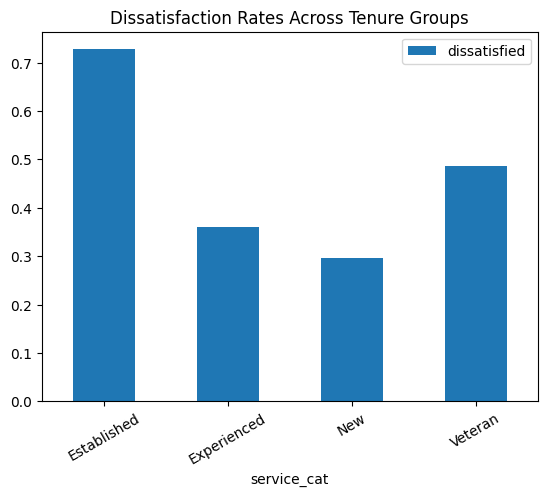

In [108]:
piv.plot(kind="bar", title="Dissatisfaction Rates Across Tenure Groups",rot=30)

From the graph, we can see from all employees that have resigned, employees that are established (worked 7-10 years) are more likely to be dissatisfied, followed by veterans (11+ years)

Now look at correlation of age, must be similar to the observations we made above (working longer lengths of year -> older employees)

In [109]:
combined_updated["age"].value_counts()

age
51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

just like previously, we make categories since there is too much variaty of ages
- <20 = 20 or younger
- 20-30 = 20s
- 30-40 = 30s
- 40-50 = 40s
- 50+ = 50 or older

In [110]:
def update_age(age):
    if age > 50:
        return "50 or Older"
    elif 40 <= age <= 50:
        return "40s"
    elif 30<= age < 40:
        return "30s"
    elif 20 < age < 30:
        return "20s"
    elif pd.isnull(age):
        return "Unknown"
    else:
        return "20 or Younger"

    

now clean entries and map new function to "age", when cleaning entries with range, grab the mid point 

In [111]:
age = combined_updated["age"].astype(str).str.lower().str.strip()
age.value_counts()

age
51-55            71
nan              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

In [112]:
nums = age.str.extract(r'(\d{1,3})\D*(\d{1,3})?')
lo = pd.to_numeric(nums[0], errors="coerce")
hi = pd.to_numeric(nums[1], errors="coerce").fillna(lo)
mid_age = (lo + hi) / 2
mid_age.value_counts()

43.0    93
48.0    81
38.0    73
53.0    71
28.0    67
23.0    62
33.0    61
56.0    29
58.0    26
61.0    23
20.0    10
Name: count, dtype: int64

In [113]:
combined_updated["age"] = mid_age.copy()
combined_updated["age_cat"] = combined_updated["age"].apply(update_age)
combined_updated["age_cat"].value_counts(dropna=False)

age_cat
40s              174
50 or Older      149
30s              134
20s              129
Unknown           55
20 or Younger     10
Name: count, dtype: int64

In [114]:
piv_age = combined_updated.pivot_table(index="age_cat", values="dissatisfied")

<Axes: title={'center': 'Age Group vs. Dissatisfaction Rate'}, xlabel='age_cat'>

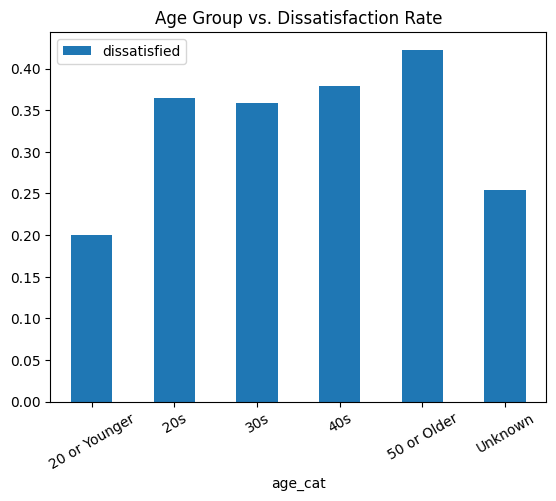

In [115]:
piv_age.plot(kind="bar", title="Age Group vs. Dissatisfaction Rate",rot=30)

Employees 50+ show the highest dissatisfaction rate, but the 20–49 groups are similar to one another. The ≤20 group is lower, many unknown variables.

Findings:
   - Resigned employees with longer services( >7 years) are much likely to leave due to dissatisfaction than those with shorter services (<6), roughly two times more on average. Within long-tenure, Established (7–10 yrs) shows the highest rate, with Veteran (11+ yrs) next.
- Age does not appear to strongly influence resignation due to dissatisfaction. Employees 50+ show the highest dissatisfaction rate, but the 20–49 groups are similar to one another. The ≤20 group looks lower, but that segment is small, so the estimate is less reliable.